## Logic Based FizzBuzz Function [Software 1.0]

In [25]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [26]:
def createInputCSV(start,end,filename):
    
    # Why list in python?
    #we use lists to store ordered collection of items
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    #we give the training data as an input to our training model 
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    #To arrange the lists in an order
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [27]:
def processData(dataset):
    
    # Why do we have to process?
    #To give the input in a systematic approach
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [28]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        #since we are haivng 1000 input data set we assume a safe point of 10 bits since 2^10=1024 
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [29]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    #encoding the labels
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

# Keras model defnition and parameters
We use the activation function to convert a input signal of node into an output signal, now this output  function is used as a input for the next layer, these activation functions introduce non-linear properties to our network.

Relu(Rectified Linear units) is one of the popuar and most used activation functions in the machine learning model.

We use relu here because the other activation functions(sigmoid, tanh) suffer from vanishing gradients, the same problem goes with tanh.

Since relu can only be applied on (dense hidden) input layers and cannot be applied on the output layers we use ‘Softmax’ function for a classification problem to compute the probabilities, incase of regression we use linear function.





In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2   # to remove overfitting we use dropout
first_dense_layer_nodes  = 256 #number of neurons 
second_dense_layer_nodes = 4 #number of outputs

def get_model():
    
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu')) #relu is used as an activation function here because it has least effect with vanishing gradients
    
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax')) #output layers we use ‘Softmax’ function for a classification problem 
    
    
    model.summary()
    
    
    model.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) #Adam has the highest accuracy when it comes to optmization
    
    return model



# <font color='blue'>Creating Training and Testing Datafiles</font>

In [31]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [32]:
model = get_model()  #gives the summary of the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               2816      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 1028      
_________________________________________________________________
activation_6 (Activation)    (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [33]:
#hyper parameters
validation_data_split = 0.2 #data split for validation
num_epochs = 10000 #number of passes
model_batch_size = 128 #divided the entire input dataset into batch_size
tb_batch_size = 32
early_patience =100 #number of epochs to wait before early stop if no progress on the validation set

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 633us/step - loss: 1.5208 - acc: 0.1528 - val_loss: 1.3394 - val_acc: 0.3500
Epoch 2/10000
720/720 [==============================] - 0s 50us/step - loss: 1.3271 - acc: 0.3625 - val_loss: 1.2027 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 38us/step - loss: 1.2189 - acc: 0.5222 - val_loss: 1.1557 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 32us/step - loss: 1.1686 - acc: 0.5333 - val_loss: 1.1643 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 52us/step - loss: 1.1517 - acc: 0.5333 - val_loss: 1.1806 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 44us/step - loss: 1.1562 - acc: 0.5333 - val_loss: 1.1838 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 50us/step - loss: 1.1496 - acc: 0.5333 - val_loss: 1.1747 - val_acc: 0.5333
E

720/720 [==============================] - 0s 40us/step - loss: 1.0619 - acc: 0.5417 - val_loss: 1.1321 - val_acc: 0.5333
Epoch 61/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0548 - acc: 0.5403 - val_loss: 1.1318 - val_acc: 0.5333
Epoch 62/10000
720/720 [==============================] - 0s 47us/step - loss: 1.0553 - acc: 0.5375 - val_loss: 1.1320 - val_acc: 0.5333
Epoch 63/10000
720/720 [==============================] - 0s 42us/step - loss: 1.0550 - acc: 0.5389 - val_loss: 1.1303 - val_acc: 0.5333
Epoch 64/10000
720/720 [==============================] - 0s 43us/step - loss: 1.0539 - acc: 0.5417 - val_loss: 1.1278 - val_acc: 0.5333
Epoch 65/10000
720/720 [==============================] - 0s 39us/step - loss: 1.0498 - acc: 0.5472 - val_loss: 1.1262 - val_acc: 0.5333
Epoch 66/10000
720/720 [==============================] - 0s 37us/step - loss: 1.0434 - acc: 0.5472 - val_loss: 1.1250 - val_acc: 0.5333
Epoch 67/10000
720/720 [==============================] 

Epoch 120/10000
720/720 [==============================] - 0s 30us/step - loss: 0.8830 - acc: 0.6167 - val_loss: 1.0509 - val_acc: 0.5556
Epoch 121/10000
720/720 [==============================] - 0s 30us/step - loss: 0.8859 - acc: 0.6153 - val_loss: 1.0480 - val_acc: 0.5500
Epoch 122/10000
720/720 [==============================] - 0s 56us/step - loss: 0.8889 - acc: 0.6042 - val_loss: 1.0501 - val_acc: 0.5333
Epoch 123/10000
720/720 [==============================] - 0s 36us/step - loss: 0.8737 - acc: 0.6361 - val_loss: 1.0462 - val_acc: 0.5389
Epoch 124/10000
720/720 [==============================] - 0s 25us/step - loss: 0.8722 - acc: 0.6389 - val_loss: 1.0440 - val_acc: 0.5556
Epoch 125/10000
720/720 [==============================] - 0s 26us/step - loss: 0.8789 - acc: 0.6333 - val_loss: 1.0444 - val_acc: 0.5278
Epoch 126/10000
720/720 [==============================] - 0s 67us/step - loss: 0.8656 - acc: 0.6264 - val_loss: 1.0409 - val_acc: 0.5444
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 50us/step - loss: 0.7350 - acc: 0.7208 - val_loss: 0.9521 - val_acc: 0.6222
Epoch 180/10000
720/720 [==============================] - 0s 53us/step - loss: 0.7225 - acc: 0.7389 - val_loss: 0.9509 - val_acc: 0.6111
Epoch 181/10000
720/720 [==============================] - 0s 32us/step - loss: 0.7164 - acc: 0.7208 - val_loss: 0.9497 - val_acc: 0.6111
Epoch 182/10000
720/720 [==============================] - 0s 56us/step - loss: 0.7177 - acc: 0.7292 - val_loss: 0.9491 - val_acc: 0.6500
Epoch 183/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7341 - acc: 0.7264 - val_loss: 0.9470 - val_acc: 0.6500
Epoch 184/10000
720/720 [==============================] - 0s 33us/step - loss: 0.7249 - acc: 0.7333 - val_loss: 0.9475 - val_acc: 0.6111
Epoch 185/10000
720/720 [==============================] - 0s 51us/step - loss: 0.7062 - acc: 0.7292 - val_loss: 0.9447 - val_acc: 0.6333
Epoch 186/10000
720/720 [=========================

720/720 [==============================] - 0s 36us/step - loss: 0.6001 - acc: 0.8139 - val_loss: 0.8648 - val_acc: 0.6778
Epoch 239/10000
720/720 [==============================] - 0s 28us/step - loss: 0.6091 - acc: 0.7944 - val_loss: 0.8638 - val_acc: 0.6889
Epoch 240/10000
720/720 [==============================] - 0s 29us/step - loss: 0.6001 - acc: 0.8000 - val_loss: 0.8628 - val_acc: 0.6833
Epoch 241/10000
720/720 [==============================] - 0s 51us/step - loss: 0.6127 - acc: 0.7903 - val_loss: 0.8624 - val_acc: 0.6889
Epoch 242/10000
720/720 [==============================] - 0s 32us/step - loss: 0.5995 - acc: 0.7986 - val_loss: 0.8621 - val_acc: 0.6778
Epoch 243/10000
720/720 [==============================] - 0s 48us/step - loss: 0.5945 - acc: 0.7972 - val_loss: 0.8603 - val_acc: 0.6778
Epoch 244/10000
720/720 [==============================] - 0s 32us/step - loss: 0.5885 - acc: 0.7778 - val_loss: 0.8579 - val_acc: 0.6778
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 62us/step - loss: 0.5429 - acc: 0.8153 - val_loss: 0.8007 - val_acc: 0.7222
Epoch 298/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5316 - acc: 0.8306 - val_loss: 0.7976 - val_acc: 0.7222
Epoch 299/10000
720/720 [==============================] - 0s 61us/step - loss: 0.5489 - acc: 0.8083 - val_loss: 0.7994 - val_acc: 0.7167
Epoch 300/10000
720/720 [==============================] - 0s 33us/step - loss: 0.5438 - acc: 0.8250 - val_loss: 0.7993 - val_acc: 0.7222
Epoch 301/10000
720/720 [==============================] - 0s 68us/step - loss: 0.5320 - acc: 0.8361 - val_loss: 0.7996 - val_acc: 0.7167
Epoch 302/10000
720/720 [==============================] - 0s 65us/step - loss: 0.5181 - acc: 0.8306 - val_loss: 0.8019 - val_acc: 0.7222
Epoch 303/10000
720/720 [==============================] - 0s 68us/step - loss: 0.5335 - acc: 0.8375 - val_loss: 0.7975 - val_acc: 0.7111
Epoch 304/10000
720/720 [=========================

720/720 [==============================] - 0s 54us/step - loss: 0.4782 - acc: 0.8292 - val_loss: 0.7443 - val_acc: 0.7500
Epoch 357/10000
720/720 [==============================] - 0s 32us/step - loss: 0.4723 - acc: 0.8403 - val_loss: 0.7497 - val_acc: 0.7500
Epoch 358/10000
720/720 [==============================] - 0s 53us/step - loss: 0.4794 - acc: 0.8472 - val_loss: 0.7476 - val_acc: 0.7611
Epoch 359/10000
720/720 [==============================] - 0s 32us/step - loss: 0.4896 - acc: 0.8472 - val_loss: 0.7444 - val_acc: 0.7611
Epoch 360/10000
720/720 [==============================] - 0s 65us/step - loss: 0.4656 - acc: 0.8611 - val_loss: 0.7427 - val_acc: 0.7611
Epoch 361/10000
720/720 [==============================] - 0s 34us/step - loss: 0.4621 - acc: 0.8500 - val_loss: 0.7451 - val_acc: 0.7556
Epoch 362/10000
720/720 [==============================] - 0s 67us/step - loss: 0.4548 - acc: 0.8472 - val_loss: 0.7489 - val_acc: 0.7500
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 31us/step - loss: 0.4418 - acc: 0.8556 - val_loss: 0.7131 - val_acc: 0.7722
Epoch 416/10000
720/720 [==============================] - 0s 30us/step - loss: 0.4155 - acc: 0.8861 - val_loss: 0.7087 - val_acc: 0.7556
Epoch 417/10000
720/720 [==============================] - 0s 31us/step - loss: 0.4474 - acc: 0.8528 - val_loss: 0.7092 - val_acc: 0.7444
Epoch 418/10000
720/720 [==============================] - 0s 31us/step - loss: 0.4200 - acc: 0.8708 - val_loss: 0.7110 - val_acc: 0.7611
Epoch 419/10000
720/720 [==============================] - 0s 31us/step - loss: 0.4572 - acc: 0.8472 - val_loss: 0.7086 - val_acc: 0.7889
Epoch 420/10000
720/720 [==============================] - 0s 30us/step - loss: 0.4363 - acc: 0.8597 - val_loss: 0.7090 - val_acc: 0.7944
Epoch 421/10000
720/720 [==============================] - 0s 65us/step - loss: 0.4127 - acc: 0.8681 - val_loss: 0.7115 - val_acc: 0.7611
Epoch 422/10000
720/720 [=========================

720/720 [==============================] - 0s 28us/step - loss: 0.3988 - acc: 0.8764 - val_loss: 0.6788 - val_acc: 0.7944
Epoch 475/10000
720/720 [==============================] - 0s 53us/step - loss: 0.3902 - acc: 0.8750 - val_loss: 0.6773 - val_acc: 0.8000
Epoch 476/10000
720/720 [==============================] - 0s 29us/step - loss: 0.4027 - acc: 0.8625 - val_loss: 0.6759 - val_acc: 0.7833
Epoch 477/10000
720/720 [==============================] - 0s 35us/step - loss: 0.3837 - acc: 0.8847 - val_loss: 0.6787 - val_acc: 0.7833
Epoch 478/10000
720/720 [==============================] - 0s 26us/step - loss: 0.4159 - acc: 0.8514 - val_loss: 0.6781 - val_acc: 0.7722
Epoch 479/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3933 - acc: 0.8681 - val_loss: 0.6719 - val_acc: 0.7833
Epoch 480/10000
720/720 [==============================] - 0s 26us/step - loss: 0.3759 - acc: 0.8958 - val_loss: 0.6695 - val_acc: 0.7833
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 53us/step - loss: 0.3799 - acc: 0.8694 - val_loss: 0.6409 - val_acc: 0.8000
Epoch 534/10000
720/720 [==============================] - 0s 65us/step - loss: 0.3583 - acc: 0.8792 - val_loss: 0.6371 - val_acc: 0.8111
Epoch 535/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3937 - acc: 0.8778 - val_loss: 0.6332 - val_acc: 0.8333
Epoch 536/10000
720/720 [==============================] - 0s 65us/step - loss: 0.3627 - acc: 0.8958 - val_loss: 0.6322 - val_acc: 0.8167
Epoch 537/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3814 - acc: 0.8736 - val_loss: 0.6382 - val_acc: 0.8111
Epoch 538/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3704 - acc: 0.8694 - val_loss: 0.6363 - val_acc: 0.8167
Epoch 539/10000
720/720 [==============================] - 0s 43us/step - loss: 0.4227 - acc: 0.8597 - val_loss: 0.6350 - val_acc: 0.8111
Epoch 540/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.3268 - acc: 0.8958 - val_loss: 0.6260 - val_acc: 0.8056
Epoch 593/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3528 - acc: 0.8778 - val_loss: 0.6268 - val_acc: 0.8167
Epoch 594/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3505 - acc: 0.8986 - val_loss: 0.6134 - val_acc: 0.8167
Epoch 595/10000
720/720 [==============================] - 0s 29us/step - loss: 0.4043 - acc: 0.8569 - val_loss: 0.6145 - val_acc: 0.8167
Epoch 596/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3498 - acc: 0.9000 - val_loss: 0.6227 - val_acc: 0.8111
Epoch 597/10000
720/720 [==============================] - 0s 14us/step - loss: 0.3318 - acc: 0.9014 - val_loss: 0.6222 - val_acc: 0.8167
Epoch 598/10000
720/720 [==============================] - 0s 32us/step - loss: 0.3443 - acc: 0.8764 - val_loss: 0.6258 - val_acc: 0.8222
Epoch 599/10000
720/720 [=========================

Epoch 651/10000
720/720 [==============================] - 0s 37us/step - loss: 0.3430 - acc: 0.8819 - val_loss: 0.6205 - val_acc: 0.8167
Epoch 652/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3587 - acc: 0.8764 - val_loss: 0.6225 - val_acc: 0.8167
Epoch 653/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3548 - acc: 0.8889 - val_loss: 0.6215 - val_acc: 0.8278
Epoch 654/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3387 - acc: 0.8917 - val_loss: 0.6189 - val_acc: 0.8222
Epoch 655/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3580 - acc: 0.8750 - val_loss: 0.6051 - val_acc: 0.8278
Epoch 656/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3401 - acc: 0.8875 - val_loss: 0.6162 - val_acc: 0.8278
Epoch 657/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3585 - acc: 0.8889 - val_loss: 0.6216 - val_acc: 0.8278
Epoch 658/10000
720/720 [=========

720/720 [==============================] - 0s 43us/step - loss: 0.3230 - acc: 0.8917 - val_loss: 0.6036 - val_acc: 0.8278
Epoch 711/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3149 - acc: 0.8972 - val_loss: 0.6017 - val_acc: 0.8333
Epoch 712/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3250 - acc: 0.8819 - val_loss: 0.5912 - val_acc: 0.8333
Epoch 713/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3263 - acc: 0.8972 - val_loss: 0.5963 - val_acc: 0.8278
Epoch 714/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3155 - acc: 0.9028 - val_loss: 0.5980 - val_acc: 0.8222
Epoch 715/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3335 - acc: 0.8764 - val_loss: 0.5950 - val_acc: 0.8167
Epoch 716/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3434 - acc: 0.8833 - val_loss: 0.5872 - val_acc: 0.8278
Epoch 717/10000
720/720 [=========================

720/720 [==============================] - 0s 43us/step - loss: 0.2913 - acc: 0.8986 - val_loss: 0.5920 - val_acc: 0.8278
Epoch 770/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2843 - acc: 0.9014 - val_loss: 0.5845 - val_acc: 0.8389
Epoch 771/10000
720/720 [==============================] - 0s 65us/step - loss: 0.3102 - acc: 0.9111 - val_loss: 0.5950 - val_acc: 0.8333
Epoch 772/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3096 - acc: 0.8931 - val_loss: 0.5751 - val_acc: 0.8333
Epoch 773/10000
720/720 [==============================] - 0s 65us/step - loss: 0.3312 - acc: 0.8806 - val_loss: 0.5767 - val_acc: 0.8444
Epoch 774/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3403 - acc: 0.8847 - val_loss: 0.5807 - val_acc: 0.8389
Epoch 775/10000
720/720 [==============================] - 0s 65us/step - loss: 0.3250 - acc: 0.9000 - val_loss: 0.5823 - val_acc: 0.8389
Epoch 776/10000
720/720 [=========================

720/720 [==============================] - 0s 11us/step - loss: 0.3359 - acc: 0.8708 - val_loss: 0.5792 - val_acc: 0.8333
Epoch 829/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3291 - acc: 0.8986 - val_loss: 0.5837 - val_acc: 0.8333
Epoch 830/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3111 - acc: 0.8889 - val_loss: 0.5852 - val_acc: 0.8278
Epoch 831/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3034 - acc: 0.9000 - val_loss: 0.5730 - val_acc: 0.8278
Epoch 832/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3036 - acc: 0.8833 - val_loss: 0.5909 - val_acc: 0.8278
Epoch 833/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3508 - acc: 0.8792 - val_loss: 0.5802 - val_acc: 0.8333
Epoch 834/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3328 - acc: 0.8833 - val_loss: 0.5674 - val_acc: 0.8500
Epoch 835/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.3364 - acc: 0.8792 - val_loss: 0.5726 - val_acc: 0.8500
Epoch 888/10000
720/720 [==============================] - 0s 43us/step - loss: 0.2867 - acc: 0.9097 - val_loss: 0.5737 - val_acc: 0.8556
Epoch 889/10000
720/720 [==============================] - 0s 65us/step - loss: 0.2930 - acc: 0.9028 - val_loss: 0.5762 - val_acc: 0.8333
Epoch 890/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3171 - acc: 0.8833 - val_loss: 0.5732 - val_acc: 0.8444
Epoch 891/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3083 - acc: 0.8903 - val_loss: 0.5889 - val_acc: 0.8222
Epoch 892/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3024 - acc: 0.8792 - val_loss: 0.5837 - val_acc: 0.8333
Epoch 893/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3328 - acc: 0.8917 - val_loss: 0.5744 - val_acc: 0.8444
Epoch 894/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.3045 - acc: 0.8889 - val_loss: 0.5988 - val_acc: 0.8167
Epoch 947/10000
720/720 [==============================] - 0s 65us/step - loss: 0.2878 - acc: 0.9069 - val_loss: 0.5991 - val_acc: 0.8278
Epoch 948/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3081 - acc: 0.8944 - val_loss: 0.6026 - val_acc: 0.8278
Epoch 949/10000
720/720 [==============================] - 0s 17us/step - loss: 0.2950 - acc: 0.9014 - val_loss: 0.6061 - val_acc: 0.8167
Epoch 950/10000
720/720 [==============================] - 0s 43us/step - loss: 0.2874 - acc: 0.8972 - val_loss: 0.6030 - val_acc: 0.8222
Epoch 951/10000
720/720 [==============================] - 0s 27us/step - loss: 0.2853 - acc: 0.9125 - val_loss: 0.5984 - val_acc: 0.8333
Epoch 952/10000
720/720 [==============================] - 0s 43us/step - loss: 0.3135 - acc: 0.8903 - val_loss: 0.6002 - val_acc: 0.8333
Epoch 953/10000
720/720 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000290931D4FD0>,
      dtype=object)

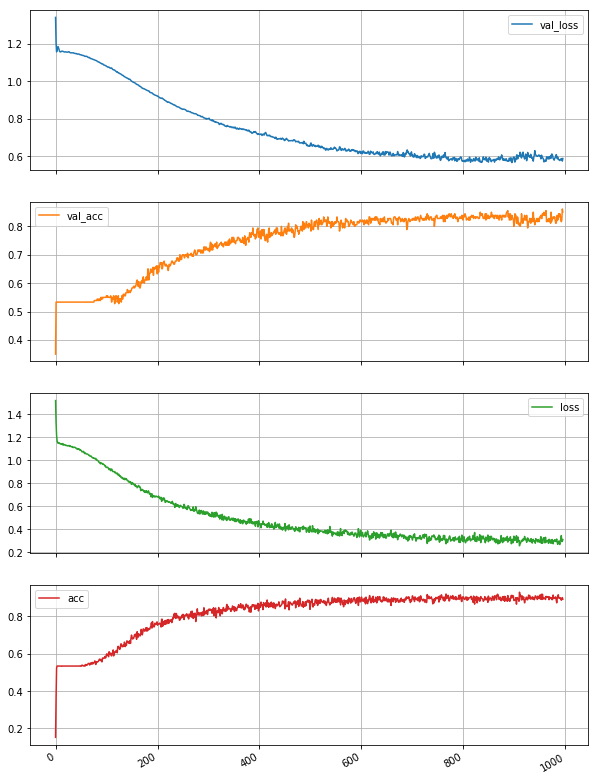

In [34]:
%matplotlib inline
df = pd.DataFrame(history.history)
# plotting validation, training accurracies and losses
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [35]:
#Decode the label back to the given condition
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [36]:
wrong   = 0
right   = 0

#read from testing.csv
testData = pd.read_csv('testing.csv')


#calculting the testing accuracy
processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100)) #printing the testing accuracy

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "50286932")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "sowmithn")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')   #writing the predicted values to the output.csv file

Errors: 15  Correct :85
Testing Accuracy: 85.0
